In [ ]:
from datasets import load_dataset
dataset = load_dataset("ailsntua/QEvasion")


c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 3448
    })
    test: Dataset({
        features: ['title', 'date', 'president', 'url', 'question_order', 'interview_question', 'interview_answer', 'gpt3.5_summary', 'gpt3.5_prediction', 'question', 'annotator_id', 'annotator1', 'annotator2', 'annotator3', 'inaudible', 'multiple_questions', 'affirmative_questions', 'index', 'clarity_label', 'evasion_label'],
        num_rows: 308
    })
})


In [ ]:
# Convert Hugging Face Dataset/DatasetDict to separate train and test DataFrames
from datasets import DatasetDict, Dataset

if isinstance(dataset, DatasetDict):
    # Extract train and test splits
    df_train = dataset['train'].to_pandas() if 'train' in dataset else None
    df_test = dataset['test'].to_pandas() if 'test' in dataset else None

    if df_train is None or df_test is None:
        raise ValueError(f"Dataset must contain 'train' and 'test' splits. Available splits: {list(dataset.keys())}")

    print(f"Train DataFrame shape: {df_train.shape}")
    print(f"Test DataFrame shape: {df_test.shape}")
elif isinstance(dataset, Dataset):
    raise ValueError("Dataset is a single Dataset, not DatasetDict. Cannot split into train and test.")
else:
    raise ValueError("Unable to process dataset")

# Show a quick preview
print("\nTrain DataFrame preview:")
print(df_train.head())
print("\nTest DataFrame preview:")
print(df_test.head())

Train DataFrame shape: (3448, 20)
Test DataFrame shape: (308, 20)

Train DataFrame preview:
                                               title                date  \
0  The President's News Conference in Hanoi, Vietnam  September 10, 2023   
1  The President's News Conference in Hanoi, Vietnam  September 10, 2023   
2  The President's News Conference in Hanoi, Vietnam  September 10, 2023   
3  The President's News Conference in Hanoi, Vietnam  September 10, 2023   
4  The President's News Conference in Hanoi, Vietnam  September 10, 2023   

         president                                                url  \
0  Joseph R. Biden  https://www.presidency.ucsb.edu/documents/the-...   
1  Joseph R. Biden  https://www.presidency.ucsb.edu/documents/the-...   
2  Joseph R. Biden  https://www.presidency.ucsb.edu/documents/the-...   
3  Joseph R. Biden  https://www.presidency.ucsb.edu/documents/the-...   
4  Joseph R. Biden  https://www.presidency.ucsb.edu/documents/the-...   

   question_

## Explatory Data Analysis(EDA)

In [ ]:
df_train.head(5)

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,annotator_id,annotator1,annotator2,annotator3,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,85,None,None,None,False,False,False,0,Clear Reply,Explicit
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,85,None,None,None,False,False,False,1,Ambivalent,General
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,85,None,None,None,False,False,False,2,Ambivalent,Partial/half-answer
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,85,None,None,None,False,False,False,3,Ambivalent,Dodging
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,85,None,None,None,False,False,False,4,Clear Reply,Explicit


In [ ]:
#There are three null columns which are annotator1, annotator2, annotator3
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  3448 non-null   object
 1   date                   3448 non-null   object
 2   president              3448 non-null   object
 3   url                    3448 non-null   object
 4   question_order         3448 non-null   int64 
 5   interview_question     3448 non-null   object
 6   interview_answer       3448 non-null   object
 7   gpt3.5_summary         3448 non-null   object
 8   gpt3.5_prediction      3448 non-null   object
 9   question               3448 non-null   object
 10  annotator_id           3448 non-null   object
 11  annotator1             0 non-null      object
 12  annotator2             0 non-null      object
 13  annotator3             0 non-null      object
 14  inaudible              3448 non-null   bool  
 15  multiple_questions   

In [ ]:
#Drop null columns
df_train = df_train.drop(["annotator1","annotator2","annotator3"], axis=1)


In [ ]:
df_train.head(5)

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,annotator_id,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,85,False,False,False,0,Clear Reply,Explicit
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,85,False,False,False,1,Ambivalent,General
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,85,False,False,False,2,Ambivalent,Partial/half-answer
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,85,False,False,False,3,Ambivalent,Dodging
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,85,False,False,False,4,Clear Reply,Explicit


In [ ]:
def plot_occurance(my_title,my_df,my_column,my_color="tab:blue"):
    #Occurance of each person
    occurence = my_df[my_column].value_counts()
    ax=occurence.plot(kind="barh",legend=False,figsize=(5,5),fontsize=14,title= my_title,ylabel="",color=my_color)
    #To add Values
    ax.bar_label(ax.containers[0], fmt='%d', padding=3)
    #Removed some spines in order to fit value label
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
    return

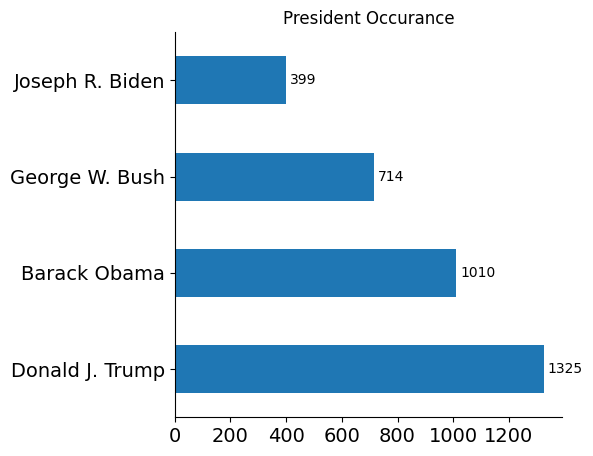

In [ ]:
#Occurance of each person
plot_occurance("President Occurance",df_train,"president")


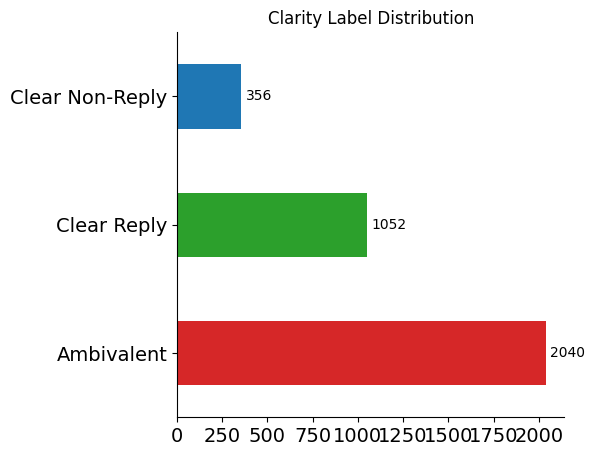

In [ ]:
#Print Clarity Label Occurance
#Color them to mathc them easir with evasion labels
bar_colors=["tab:red","tab:green","tab:blue"]
plot_occurance("Clarity Label Distribution",df_train,"clarity_label",bar_colors)

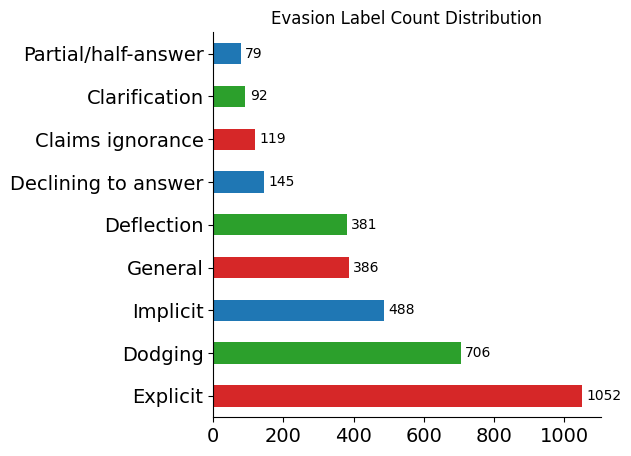

In [ ]:
#Plot Distribution of Evasion Labels
#Use their upper label's color in order to match them easily
#Example Ambivient is red so Deflection is also red because it is a sub class of Ambivient
plot_occurance("Evasion Label Count Distribution",df_train,"evasion_label",bar_colors)

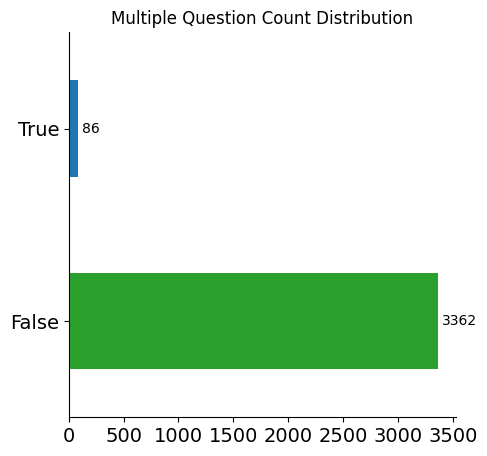

In [ ]:
# How many questions are multiple questions
bar_colors=["tab:green","tab:blue"]
plot_occurance("Multiple Question Count Distribution",df_train,"multiple_questions",bar_colors)

### QUESTION ORDER FREQUENCY

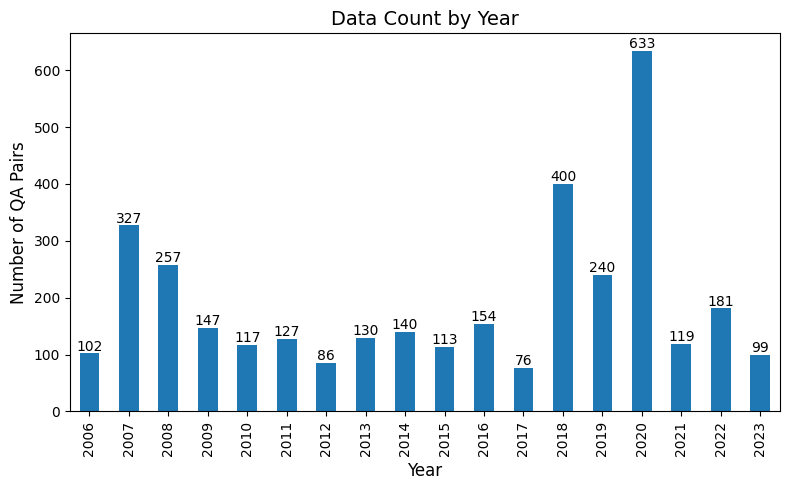

In [ ]:
df_train["date"] = pd.to_datetime(df_train["date"], errors="coerce") # Ensure date is in datetime format
df_train["year"] = df_train["date"].dt.year # Extract year
year_counts = df_train["year"].value_counts().sort_index() # Count distribution by year

plt.figure(figsize=(8,5))
year_counts.plot(kind="bar", color="tab:blue")

plt.title("Data Count by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of QA Pairs", fontsize=12)

for i, v in enumerate(year_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### CLARITY DISTRIBUTION BY QUESTION ORDER

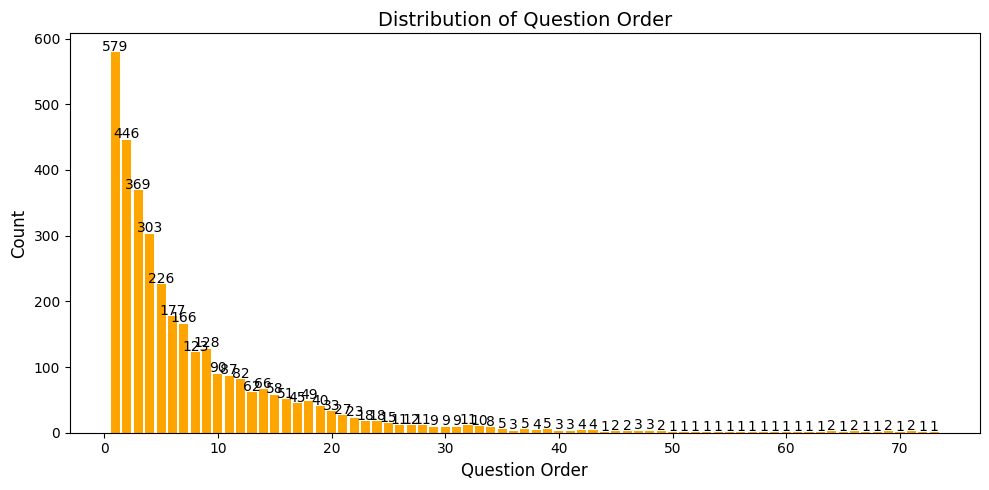

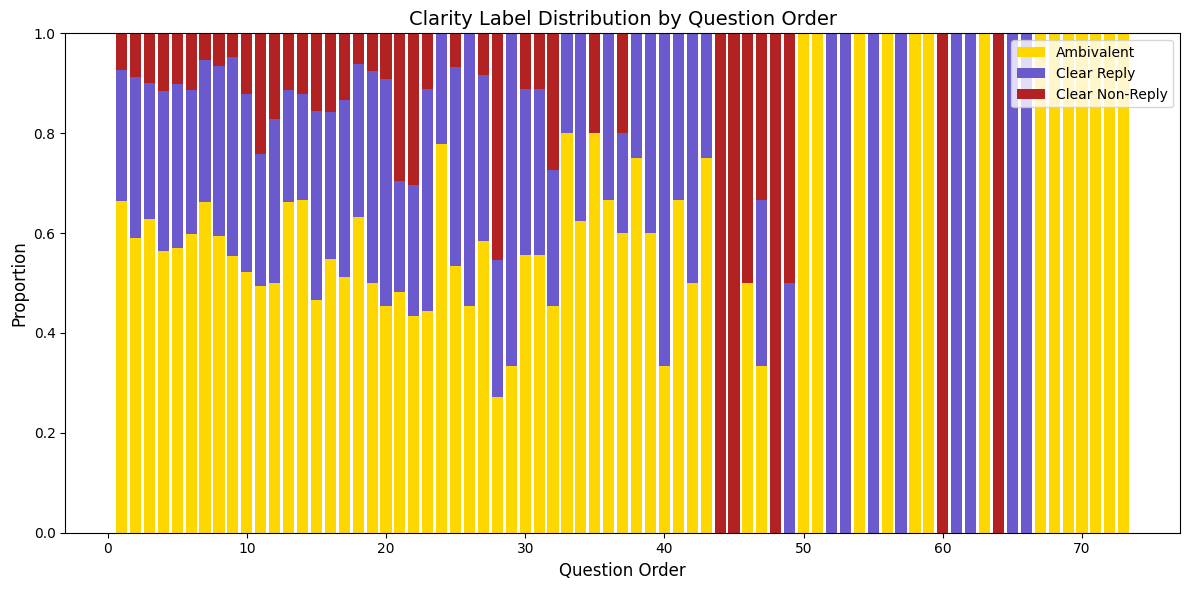

In [ ]:
# --- 1) Question Order Distribution (frequency plot) ---

q_order_counts = df_train['question_order'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(q_order_counts.index, q_order_counts.values, color='orange')

plt.title("Distribution of Question Order", fontsize=14)
plt.xlabel("Question Order", fontsize=12)
plt.ylabel("Count", fontsize=12)

for x, y in zip(q_order_counts.index, q_order_counts.values):
    plt.text(x, y + 2, str(y), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

order_clarity = pd.crosstab(
    df_train['question_order'],
    df_train['clarity_label'],
    normalize='index'
)

orders = order_clarity.index
ambivalent = order_clarity['Ambivalent']
clear_reply = order_clarity['Clear Reply']
clear_nonreply = order_clarity['Clear Non-Reply']

plt.figure(figsize=(12, 6))

plt.bar(orders, ambivalent, color='gold', label='Ambivalent')

plt.bar(orders, clear_reply, bottom=ambivalent, color='slateblue', label='Clear Reply')

plt.bar(
    orders,
    clear_nonreply,
    bottom=ambivalent + clear_reply,
    color='firebrick',
    label='Clear Non-Reply'
)

plt.title("Clarity Label Distribution by Question Order", fontsize=14)
plt.xlabel("Question Order", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### AFFIRMATIVE QUESTIONS ANALYSIS

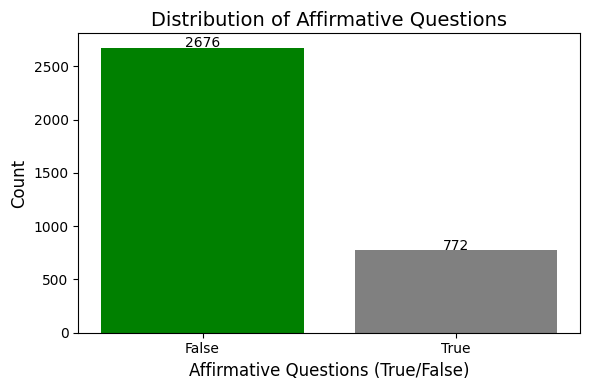

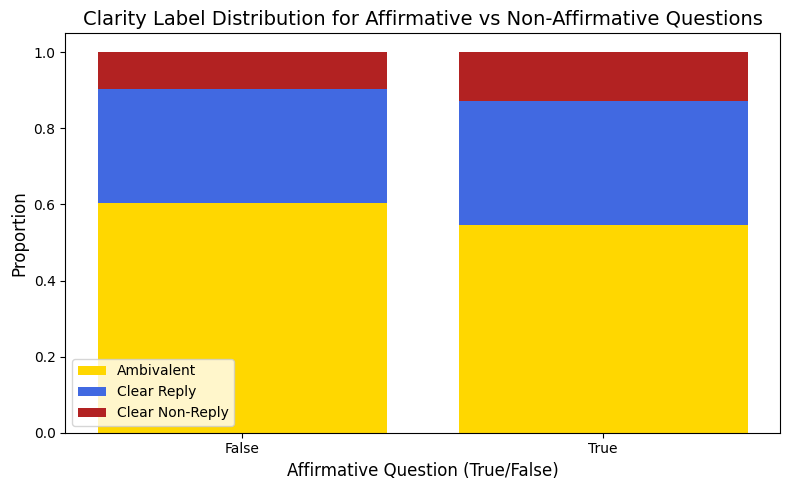

In [ ]:
# --- A) Affirmative question frequency ---

affirm_counts = df_train['affirmative_questions'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(affirm_counts.index.astype(str), affirm_counts.values, color=['green', 'gray'])

plt.title("Distribution of Affirmative Questions", fontsize=14)
plt.xlabel("Affirmative Questions (True/False)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Barların üstüne sayı yazma
for x, y in zip(affirm_counts.index.astype(str), affirm_counts.values):
    plt.text(x, y + 2, str(y), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# --- B) Clarity labels by affirmative flag (stacked bar chart) ---

affirm_clarity = pd.crosstab(
    df_train['affirmative_questions'],
    df_train['clarity_label'],
    normalize='index'
)

flags = affirm_clarity.index.astype(str)
amb = affirm_clarity['Ambivalent']
clr = affirm_clarity['Clear Reply']
non = affirm_clarity['Clear Non-Reply']

plt.figure(figsize=(8,5))

# (Ambivalent)
plt.bar(flags, amb, color='gold', label='Ambivalent')

# (Clear Reply)
plt.bar(flags, clr, bottom=amb, color='royalblue', label='Clear Reply')

# (Clear Non-Reply)
plt.bar(flags, non, bottom=amb + clr, color='firebrick', label='Clear Non-Reply')

plt.title("Clarity Label Distribution for Affirmative vs Non-Affirmative Questions", fontsize=14)
plt.xlabel("Affirmative Question (True/False)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
#true false değişecek

In [ ]:
#hypothesis test yapılabilir

### INAUDIBLE FLAG ANALYSIS

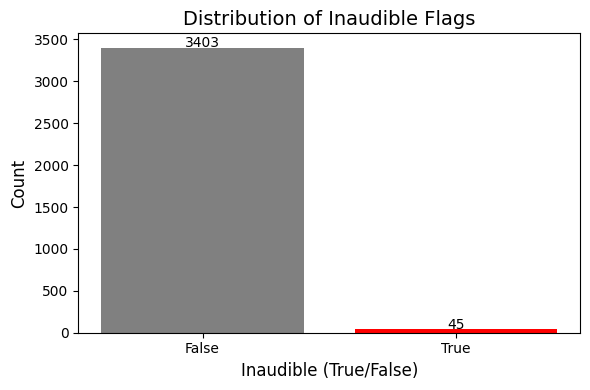

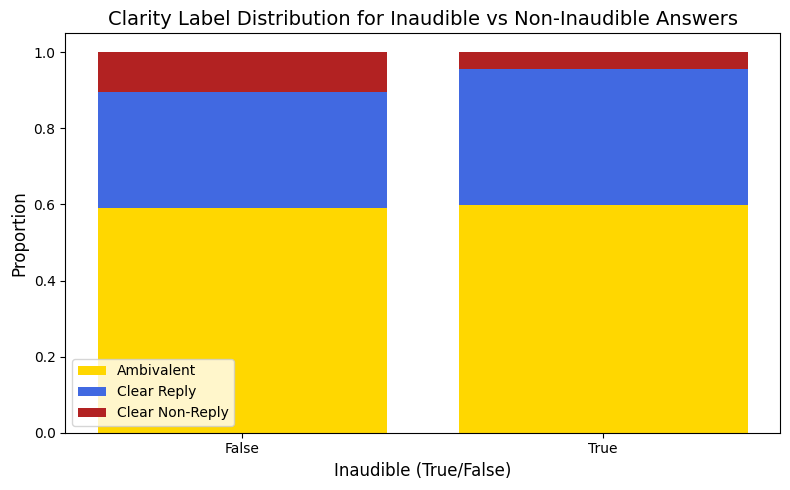

In [ ]:
# --- A) Inaudible flag distribution ---

inaud_counts = df_train['inaudible'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(inaud_counts.index.astype(str), inaud_counts.values, color=['gray', 'red'])

plt.title("Distribution of Inaudible Flags", fontsize=14)
plt.xlabel("Inaudible (True/False)", fontsize=12)
plt.ylabel("Count", fontsize=12)

for x, y in zip(inaud_counts.index.astype(str), inaud_counts.values):
    plt.text(x, y + 2, str(y), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# --- B) Clarity distribution by inaudible flag (stacked bar chart) ---

inaud_clarity = pd.crosstab(
    df_train['inaudible'],
    df_train['clarity_label'],
    normalize='index'
)

flags = inaud_clarity.index.astype(str)
amb = inaud_clarity['Ambivalent']
clr = inaud_clarity['Clear Reply']
non = inaud_clarity['Clear Non-Reply']

plt.figure(figsize=(8,5))

plt.bar(flags, amb, color='gold', label='Ambivalent')

plt.bar(flags, clr, bottom=amb, color='royalblue', label='Clear Reply')

plt.bar(flags, non, bottom=amb + clr, color='firebrick', label='Clear Non-Reply')

plt.title("Clarity Label Distribution for Inaudible vs Non-Inaudible Answers", fontsize=14)
plt.xlabel("Inaudible (True/False)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Clarity × Evasion Type Heatmap

evasion_label    Claims ignorance  Clarification  Declining to answer  \
clarity_label                                                           
Ambivalent                      0              0                    0   
Clear Non-Reply               119             92                  145   
Clear Reply                     0              0                    0   

evasion_label    Deflection  Dodging  Explicit  General  Implicit  \
clarity_label                                                       
Ambivalent              381      706         0      386       488   
Clear Non-Reply           0        0         0        0         0   
Clear Reply               0        0      1052        0         0   

evasion_label    Partial/half-answer  
clarity_label                         
Ambivalent                        79  
Clear Non-Reply                    0  
Clear Reply                        0  


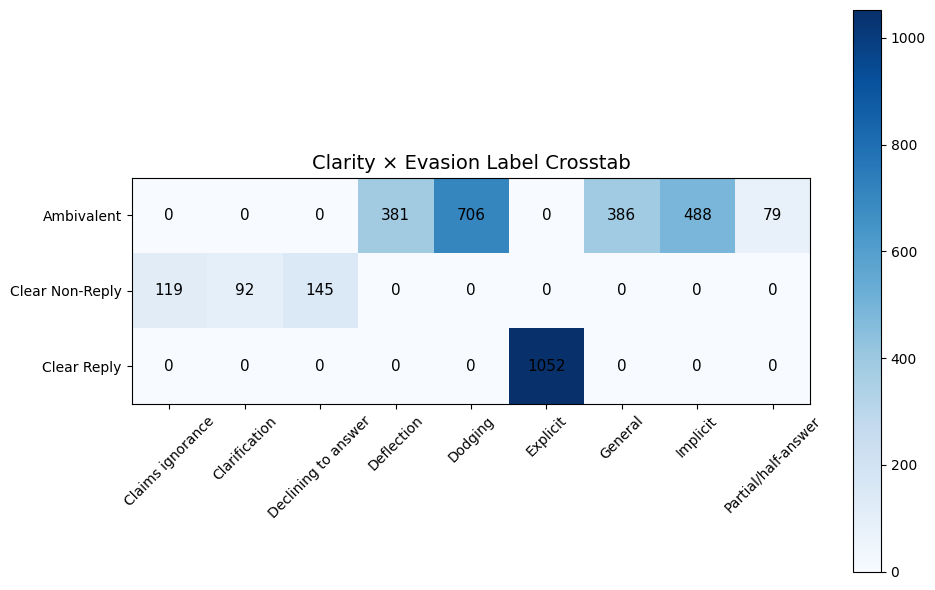

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1) Crosstab oluşturma ---
cross_tab = pd.crosstab(df_train['clarity_label'], df_train['evasion_label'])

print(cross_tab)  # tabloyu konsolda da görelim


# --- 2) Heatmap benzeri görselleştirme ---
plt.figure(figsize=(10, 6))

# Görselleştirilecek değerler
data = cross_tab.values

# Heatmap'i imshow ile çiziyoruz
plt.imshow(data, cmap='Blues')

# Eksen etiketleri
plt.xticks(np.arange(len(cross_tab.columns)), cross_tab.columns, rotation=45, fontsize=10)
plt.yticks(np.arange(len(cross_tab.index)), cross_tab.index, fontsize=10)

plt.title("Clarity × Evasion Label Crosstab", fontsize=14)

# Renk barı (optional ama profesyonel durur)
plt.colorbar()

# Hücrelerin içine sayıları yazma
for i in range(data.shape[0]):           # satırlar
    for j in range(data.shape[1]):       # sütunlar
        plt.text(j, i, str(data[i, j]),
                 ha='center', va='center', color='black', fontsize=11)

plt.tight_layout()
plt.show()


### PRESIDENT × CLARITY ANALYSIS

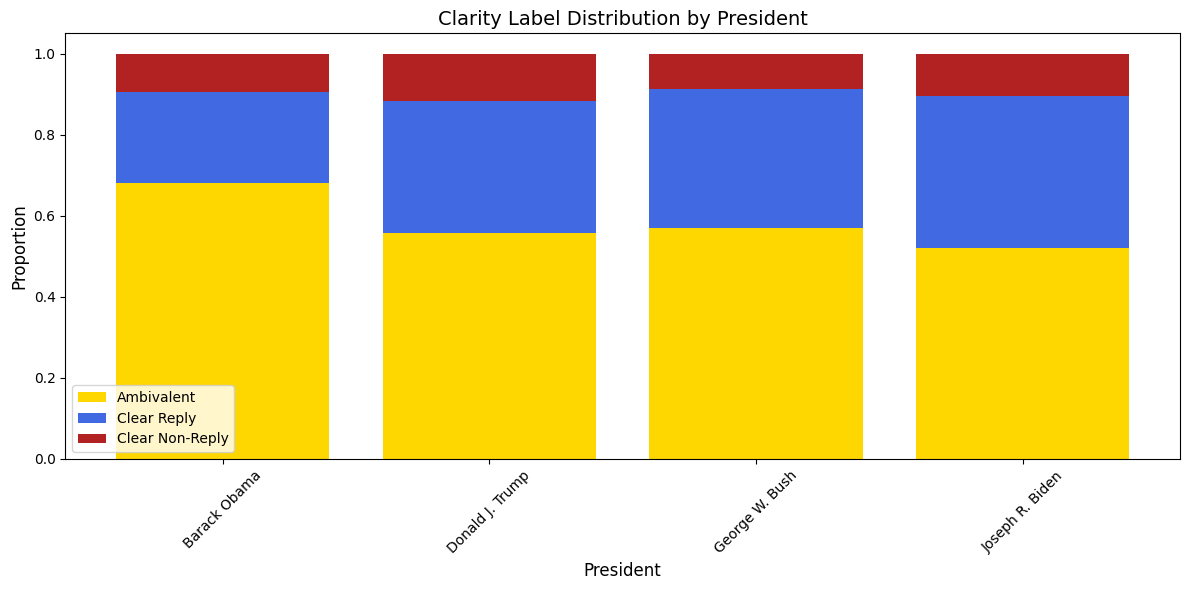

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1) Crosstab ---
pres_clarity = pd.crosstab(
    df_train['president'],
    df_train['clarity_label'],
    normalize='index'
)

# Değerleri çekelim
presidents = pres_clarity.index
amb = pres_clarity['Ambivalent']
clr = pres_clarity['Clear Reply']
non = pres_clarity['Clear Non-Reply']

plt.figure(figsize=(12,6))

# Stacked barların 1. katmanı
plt.bar(presidents, amb, color='gold', label='Ambivalent')

# 2. katman
plt.bar(presidents, clr, bottom=amb, color='royalblue', label='Clear Reply')

# 3. katman
plt.bar(presidents, non, bottom=amb + clr, color='firebrick', label='Clear Non-Reply')

plt.title("Clarity Label Distribution by President", fontsize=14)
plt.xlabel("President", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### PRESIDENT × EVASION ANALYSIS

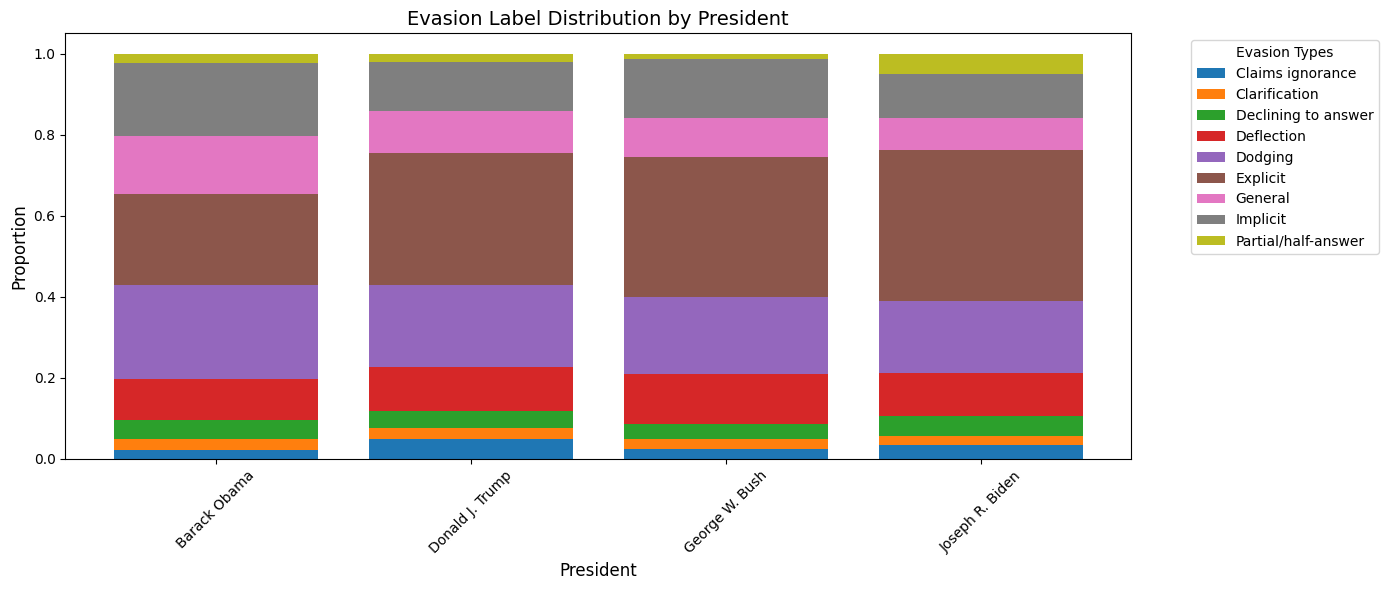

In [ ]:
# --- 1) Crosstab ---
pres_evasion = pd.crosstab(
    df_train['president'],
    df_train['evasion_label'],
    normalize='index'
)

# Values
presidents = pres_evasion.index
ev_columns = pres_evasion.columns

plt.figure(figsize=(14,6))

# Çok kolon olabilir: döngüyle stacked bar çiziyoruz
bottom_stack = np.zeros(len(presidents))

for ev_type in ev_columns:
    plt.bar(
        presidents,
        pres_evasion[ev_type],
        bottom=bottom_stack,
        label=ev_type
    )
    bottom_stack += pres_evasion[ev_type]

plt.title("Evasion Label Distribution by President", fontsize=14)
plt.xlabel("President", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Evasion Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### QUESTION / ANSWER LENGTH (Word Count)

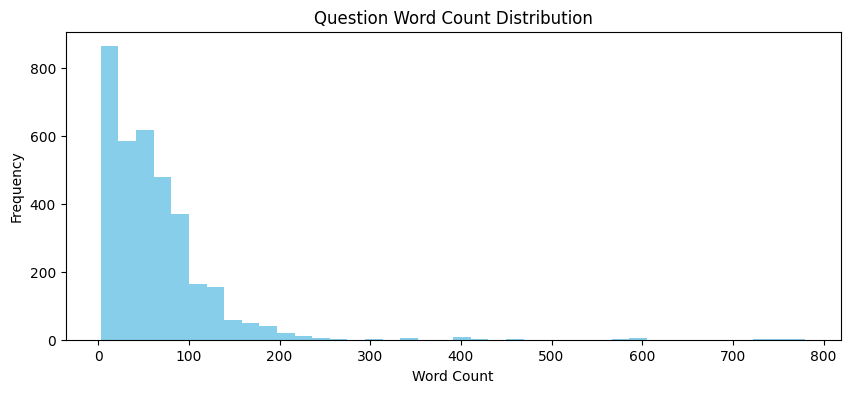

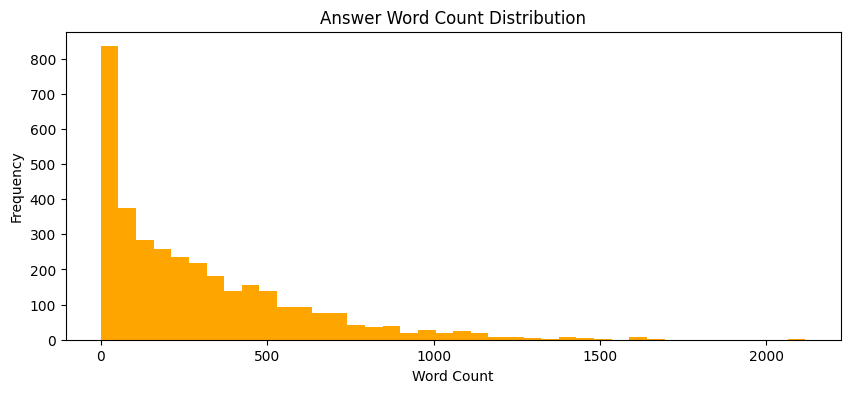

In [ ]:
# --- Word count helper ---
def word_count(text):
    if isinstance(text, str):
        return len(text.split())
    return 0

df_train['question_word_count'] = df_train['interview_question'].apply(word_count)
df_train['answer_word_count'] = df_train['interview_answer'].apply(word_count)

plt.figure(figsize=(10,4))
plt.hist(df_train['question_word_count'], bins=40, color='skyblue')
plt.title("Question Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
plt.hist(df_train['answer_word_count'], bins=40, color='orange')
plt.title("Answer Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


### SENTENCE COUNT

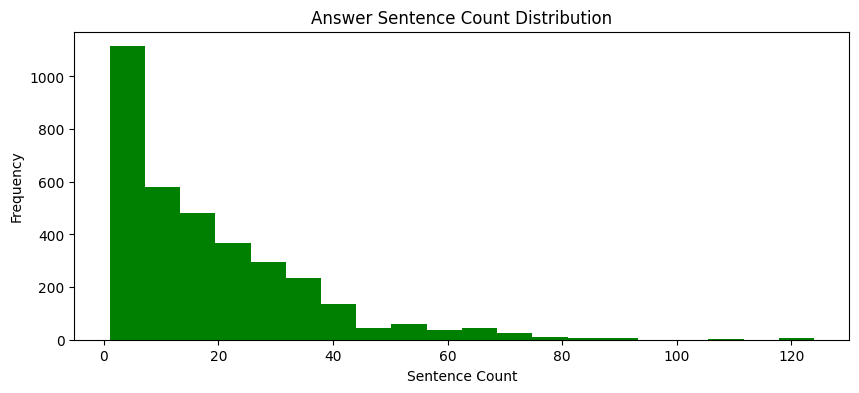

In [ ]:
import re

def sentence_count(text):
    if not isinstance(text, str):
        return 0
    # Nokta, soru işareti, ünlem → cümle sonu
    sentences = re.split(r'[.!?]+', text)
    # boş olanları sayma
    return len([s for s in sentences if s.strip() != ""])

df_train['question_sentence_count'] = df_train['interview_question'].apply(sentence_count)
df_train['answer_sentence_count'] = df_train['interview_answer'].apply(sentence_count)

# Histogram çizelim
plt.figure(figsize=(10,4))
plt.hist(df_train['answer_sentence_count'], bins=20, color='green')
plt.title("Answer Sentence Count Distribution")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.show()


### JACCARD SIMILARITY (Raw)

Jaccard Similarity: J = abs(A∩B) / abs(A⋃B)

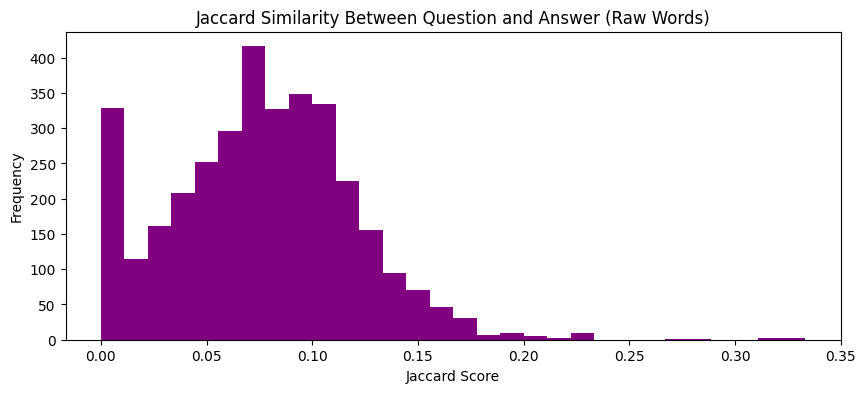

In [ ]:
def jaccard_similarity(q, a):
    if not isinstance(q, str) or not isinstance(a, str):
        return 0.0
    q_set = set(q.lower().split())
    a_set = set(a.lower().split())

    if len(q_set.union(a_set)) == 0:
        return 0.0

    return len(q_set.intersection(a_set)) / len(q_set.union(a_set))

df_train['jaccard_raw'] = df_train.apply(
    lambda row: jaccard_similarity(row['interview_question'], row['interview_answer']),
    axis=1
)

# Histogram
plt.figure(figsize=(10,4))
plt.hist(df_train['jaccard_raw'], bins=30, color='purple')
plt.title("Jaccard Similarity Between Question and Answer (Raw Words)")
plt.xlabel("Jaccard Score")
plt.ylabel("Frequency")
plt.show()


### WORD FREQUENCY COMPARISON (Top Words)

Top 20 Question Words:
[('the', 10651), ('you', 10243), ('to', 7232), ('and', 5880), ('that', 5498), ('of', 4527), ('in', 4011), ('q', 3719), ('a', 3602), ('president', 2937), ('is', 2554), ('your', 2242), ('do', 2236), ('s', 2196), ('what', 2144), ('on', 2101), ('are', 2057), ('it', 1821), ('mr', 1791), ('about', 1789)]

Top 20 Answer Words:
[('the', 48155), ('to', 39260), ('and', 35953), ('that', 32371), ('i', 26123), ('we', 24479), ('of', 24024), ('a', 22444), ('in', 18323), ('it', 16954), ('is', 16206), ('s', 15312), ('have', 10519), ('you', 10140), ('they', 9196), ('be', 8468), ('for', 8123), ('are', 8010), ('with', 7756), ('this', 7656)]


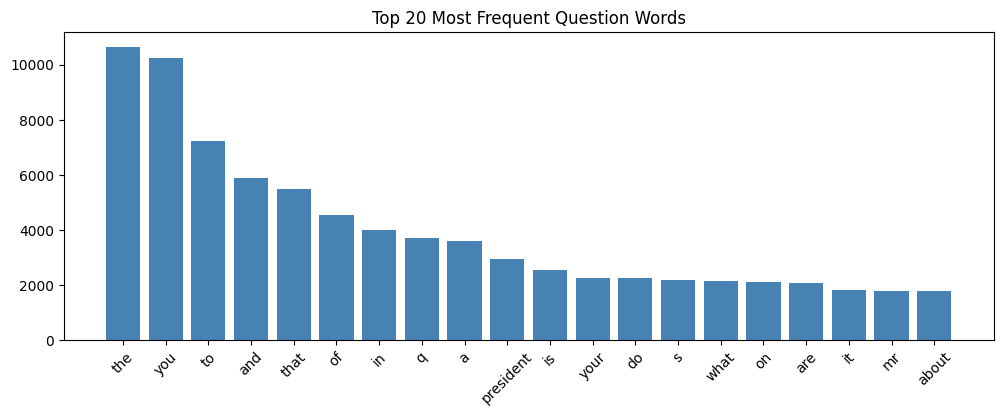

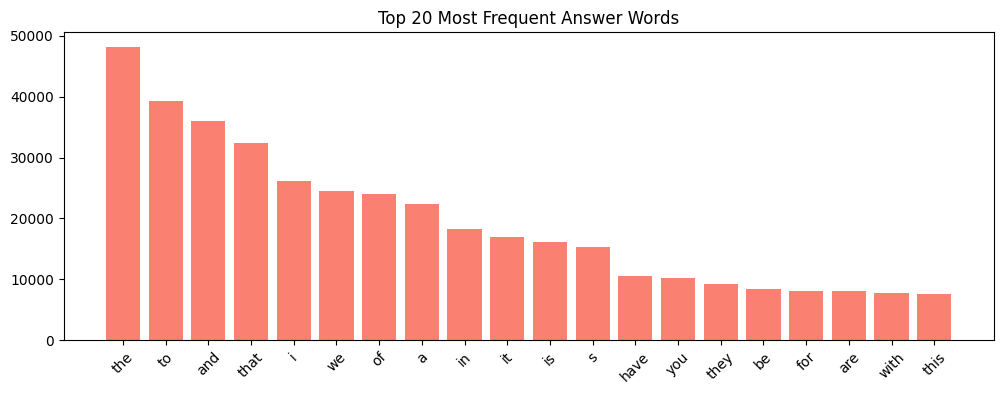

In [ ]:
from collections import Counter
import re

def tokenize(text):
    # basit word tokenizer
    return re.findall(r'\b\w+\b', text.lower()) if isinstance(text, str) else []

# Tüm soruları birleştir
all_questions = []
for q in df_train['interview_question']:
    all_questions.extend(tokenize(q))

# Tüm cevapları birleştir
all_answers = []
for a in df_train['interview_answer']:
    all_answers.extend(tokenize(a))

# En çok geçen 20 kelime
q_freq = Counter(all_questions).most_common(20)
a_freq = Counter(all_answers).most_common(20)

print("Top 20 Question Words:")
print(q_freq)
print("\nTop 20 Answer Words:")
print(a_freq)

# Bar graph
plt.figure(figsize=(12,4))
plt.bar([w for w,_ in q_freq], [c for _,c in q_freq], color='steelblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Question Words")
plt.show()

plt.figure(figsize=(12,4))
plt.bar([w for w,_ in a_freq], [c for _,c in a_freq], color='salmon')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Answer Words")
plt.show()


## Preprocessing

### Basic Normalization (Lowercasing, Punctuation Removal, Stopword Filtering)

In [ ]:
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords once (if needed)
# nltk.download('stopwords')

# 1) Load English stopword list
stop_words = set(stopwords.words('english'))

# 2) Words to KEEP — these should NOT be removed
#    Negation markers + Pronouns
keep_words = {
    "no", "not", "never", "none", "nobody", "nothing", "nowhere", "neither", "nor", "n't",
    "i", "we", "you", "they", "he", "she", "it", "me", "us", "them", "him", "her",
    "our", "your", "their"
}

# Remove these from stopwords
stop_words = stop_words.difference(keep_words)

# 3) Punctuation removal table
punct_table = str.maketrans('', '', string.punctuation)

def basic_clean(text):
    """
    Performs:
    • lowercasing
    • punctuation removal
    • stopword removal (but keeps negations + pronouns)
    """
    if not isinstance(text, str):
        return ""

    # lowercase
    text = text.lower()

    # remove punctuation
    text = text.translate(punct_table)

    # tokenize
    tokens = text.split()

    # filter stopwords
    tokens = [tok for tok in tokens if tok not in stop_words]

    return " ".join(tokens)


# 4) Apply to question and answer fields
df_train["question_clean_basic"] = df_train["interview_question"].apply(basic_clean)
df_train["answer_clean_basic"]   = df_train["interview_answer"].apply(basic_clean)

# 5) Inspect the output
df_train[["interview_question", "question_clean_basic"]].head()


,interview_question,question_clean_basic
0,Q. Of the Biden administration. And accused th...,q biden administration accused united states c...
1,Q. Of the Biden administration. And accused th...,q biden administration accused united states c...
2,Q. No worries. Do you believe the country's sl...,q no worries you believe countrys slowdown gro...
3,Q. No worries. Do you believe the country's sl...,q no worries you believe countrys slowdown gro...
4,"Q. I can imagine. It is evening, I'd like to r...",q i imagine it evening id like remind you laug...


### Lowercasing

In [ ]:
def to_lowercase(text):
    """
    Converts text to lowercase.
    Handles None / non-string values safely.
    """
    if not isinstance(text, str):
        return ""
    return text.lower()

# Apply to question and answer columns
df_train["question_lower"] = df_train["interview_question"].apply(to_lowercase)
df_train["answer_lower"]   = df_train["interview_answer"].apply(to_lowercase)

# Preview
df_train[["interview_question", "question_lower"]].head()


,interview_question,question_lower
0,Q. Of the Biden administration. And accused th...,q. of the biden administration. and accused th...
1,Q. Of the Biden administration. And accused th...,q. of the biden administration. and accused th...
2,Q. No worries. Do you believe the country's sl...,q. no worries. do you believe the country's sl...
3,Q. No worries. Do you believe the country's sl...,q. no worries. do you believe the country's sl...
4,"Q. I can imagine. It is evening, I'd like to r...","q. i can imagine. it is evening, i'd like to r..."


### Lemmatization by using spaCy

In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    """
    Lemmatizes a given text using spaCy.
    Returns a string of lemmas.
    """
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# Apply to lowercase text or cleaned text
df_train["question_lemma"] = df_train["question_lower"].apply(lemmatize_text)
df_train["answer_lemma"]   = df_train["answer_lower"].apply(lemmatize_text)

# Inspect output
df_train[["question_lower", "question_lemma"]].head()


,question_lower,question_lemma
0,q. of the biden administration. and accused th...,q. of the biden administration . and accuse th...
1,q. of the biden administration. and accused th...,q. of the biden administration . and accuse th...
2,q. no worries. do you believe the country's sl...,q. no worry . do you believe the country 's sl...
3,q. no worries. do you believe the country's sl...,q. no worry . do you believe the country 's sl...
4,"q. i can imagine. it is evening, i'd like to r...","q. I can imagine . it be evening , I would lik..."


### Stemming

In [ ]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer("english")

def snowball_stem_text(text):
    """
    Applies NLTK Snowball stemming to every token.
    """
    if not isinstance(text, str):
        return ""

    tokens = text.split()
    stems = [snowball.stem(tok) for tok in tokens]
    return " ".join(stems)

df_train["question_snow"] = df_train["question_lower"].apply(snowball_stem_text)
df_train["answer_snow"]   = df_train["answer_lower"].apply(snowball_stem_text)


### Part-of-Speech (POS) Tagging

In [ ]:
# 1) Load spaCy English model (if not already loaded)
# If you haven't downloaded the model yet, run this once in a terminal:
#   python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")


def get_pos_tags(text):
    """
    Returns a list of POS tags for the given text.
    Uses spaCy's coarse-grained POS tags (token.pos_).
    """
    if not isinstance(text, str):
        return []

    doc = nlp(text)
    return [token.pos_ for token in doc]


def get_token_pos_pairs(text):
    """
    Returns a string with 'token/POS' pairs, e.g.:
    'we/PRON will/AUX win/VERB'
    This can be useful for inspection and debugging.
    """
    if not isinstance(text, str):
        return ""

    doc = nlp(text)
    pairs = [f"{token.text}/{token.pos_}" for token in doc]
    return " ".join(pairs)


# 2) Apply POS tagging to questions and answers
# You can use raw text or lowercase text — here we use the lowercase version if you created it.
question_source = df_train.get("question_lower", df_train["interview_question"])
answer_source   = df_train.get("answer_lower", df_train["interview_answer"])

df_train["question_pos_tags"]   = question_source.apply(get_pos_tags)
df_train["answer_pos_tags"]     = answer_source.apply(get_pos_tags)

df_train["question_token_pos"]  = question_source.apply(get_token_pos_pairs)
df_train["answer_token_pos"]    = answer_source.apply(get_token_pos_pairs)

# 3) Inspect a few examples
df_train[[
    "interview_question",
    "question_token_pos",
    "question_pos_tags"
]].head()


,interview_question,question_token_pos,question_pos_tags
0,Q. Of the Biden administration. And accused th...,q./NOUN of/ADP the/DET biden/PROPN administrat...,"[NOUN, ADP, DET, PROPN, NOUN, PUNCT, CCONJ, VE..."
1,Q. Of the Biden administration. And accused th...,q./NOUN of/ADP the/DET biden/PROPN administrat...,"[NOUN, ADP, DET, PROPN, NOUN, PUNCT, CCONJ, VE..."
2,Q. No worries. Do you believe the country's sl...,q./NOUN no/DET worries/NOUN ./PUNCT do/AUX you...,"[NOUN, DET, NOUN, PUNCT, AUX, PRON, VERB, DET,..."
3,Q. No worries. Do you believe the country's sl...,q./NOUN no/DET worries/NOUN ./PUNCT do/AUX you...,"[NOUN, DET, NOUN, PUNCT, AUX, PRON, VERB, DET,..."
4,"Q. I can imagine. It is evening, I'd like to r...",q./NOUN i/PRON can/AUX imagine/VERB ./PUNCT it...,"[NOUN, PRON, AUX, VERB, PUNCT, PRON, AUX, NOUN..."


### Named Entity Recognition (NER)

In [ ]:
import spacy

# If not already loaded earlier:
# python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")

try:
    nlp
except NameError:
    nlp = spacy.load("en_core_web_sm")


def extract_entities(text):
    """
    Returns a list of (entity_text, entity_label) tuples for a given text.
    Example: [("China", "GPE"), ("Biden", "PERSON")]
    """
    if not isinstance(text, str):
        return []

    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]


def entities_as_string(text):
    """
    Returns a compact string representation of entities, e.g.:
    'China/GPE; Biden/PERSON'
    Useful for debugging / inspection.
    """
    if not isinstance(text, str):
        return ""

    doc = nlp(text)
    pairs = [f"{ent.text}/{ent.label_}" for ent in doc.ents]
    return "; ".join(pairs)


# Choose source text (lowercased or raw)
question_source = df_train.get("question_lower", df_train["interview_question"])
answer_source   = df_train.get("answer_lower", df_train["interview_answer"])

# Apply NER
df_train["question_entities"]      = question_source.apply(extract_entities)
df_train["answer_entities"]        = answer_source.apply(extract_entities)

df_train["question_entities_str"]  = question_source.apply(entities_as_string)
df_train["answer_entities_str"]    = answer_source.apply(entities_as_string)

# Quick sanity check
df_train[[
    "interview_question",
    "question_entities",
    "question_entities_str"
]].head()


,interview_question,question_entities,question_entities_str
0,Q. Of the Biden administration. And accused th...,"[(the united states, GPE), (china, GPE), (xi, ...",the united states/GPE; china/GPE; xi/PERSON; c...
1,Q. Of the Biden administration. And accused th...,"[(the united states, GPE), (china, GPE), (xi, ...",the united states/GPE; china/GPE; xi/PERSON; c...
2,Q. No worries. Do you believe the country's sl...,"[(china, GPE), (putin, PERSON), (kim jong un, ...",china/GPE; putin/PERSON; kim jong un/PERSON; r...
3,Q. No worries. Do you believe the country's sl...,"[(china, GPE), (putin, PERSON), (kim jong un, ...",china/GPE; putin/PERSON; kim jong un/PERSON; r...
4,"Q. I can imagine. It is evening, I'd like to r...","[(evening, TIME), (the last 6 months, DATE), (...",evening/TIME; the last 6 months/DATE; japan/GP...


en_core_web_md not found. Run in terminal:
python -m spacy download en_core_web_md

=== en_core_web_sm Example ===
TEXT : Well, look, first of all, theI am sincere about getting the relationship right. And one of the things that is going on now is, China is beginning to change some of the rules of the game, in terms of t ...
LEMMAS: ['well', ',', 'look', ',', 'first', 'of', 'all', ',', 'thei', 'be', 'sincere', 'about', 'get', 'the', 'relationship', 'right', '.', 'and', 'one', 'of']
POS   : ['INTJ', 'PUNCT', 'VERB', 'PUNCT', 'ADV', 'ADP', 'PRON', 'PUNCT', 'ADJ', 'AUX', 'ADJ', 'ADP', 'VERB', 'DET', 'NOUN', 'ADJ', 'PUNCT', 'CCONJ', 'NUM', 'ADP']
ENTS  : [('first', 'ORDINAL'), ('one', 'CARDINAL'), ('China', 'GPE'), ('the Chinese Government', 'ORG'), ('China', 'GPE')]

=== Benchmark results ===
            model   time_sec  time_per_doc_ms  avg_tokens_per_doc  \
0  en_core_web_sm  26.130049        52.260097             301.634   

   avg_ents_per_doc  
0            10.916  


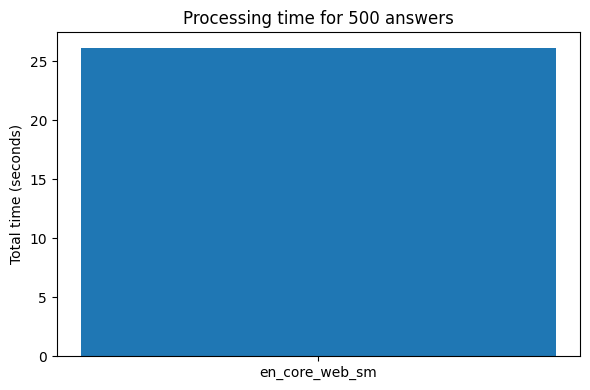

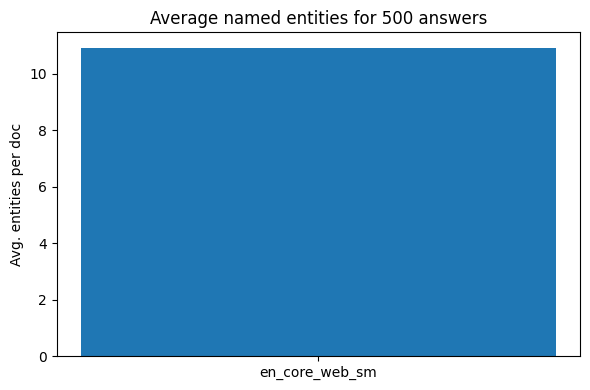

In [ ]:
# ================================
# Small vs Medium spaCy Comparison
# ================================
import time
import spacy
import pandas as pd
import matplotlib.pyplot as plt

# Eğer matplotlib yoksa önce:
# pip install matplotlib

# 1) Modelleri yükle
nlp_sm = spacy.load("en_core_web_sm")

try:
    nlp_md = spacy.load("en_core_web_md")
    print("Loaded en_core_web_md successfully.")
except OSError:
    nlp_md = None
    print("en_core_web_md not found. Run in terminal:\n"
          "python -m spacy download en_core_web_md")

# 2) Örnek veri seç (cevaplardan ilk N tanesi)
N = 500  # istersen değiştir
sample_texts = df_train["interview_answer"].head(N).tolist()


def benchmark_model(nlp, texts, model_name="model"):
    """
    Verilen spaCy modeli ile:
    - toplam süre
    - doc başına ortalama token sayısı
    - doc başına ortalama entity sayısı
    hesaplar ve bir dict döner.
    """
    t0 = time.time()
    docs = list(nlp.pipe(texts, batch_size=64))
    t1 = time.time()

    total_time = t1 - t0
    n_docs = len(docs)

    token_counts = [len(doc) for doc in docs]
    ent_counts = [len(doc.ents) for doc in docs]

    avg_tokens = sum(token_counts) / n_docs
    avg_ents = sum(ent_counts) / n_docs

    # Örnek çıktıyı görmek için:
    ex_doc = docs[0]
    print(f"\n=== {model_name} Example ===")
    print("TEXT :", texts[0][:200], "...")
    print("LEMMAS:", [t.lemma_ for t in ex_doc[:20]])
    print("POS   :", [t.pos_ for t in ex_doc[:20]])
    print("ENTS  :", [(ent.text, ent.label_) for ent in ex_doc.ents][:5])
    print("===========================")

    return {
        "model": model_name,
        "time_sec": total_time,
        "time_per_doc_ms": (total_time / n_docs) * 1000,
        "avg_tokens_per_doc": avg_tokens,
        "avg_ents_per_doc": avg_ents,
    }


results = []

# small model
results.append(benchmark_model(nlp_sm, sample_texts, "en_core_web_sm"))

# medium model (varsa)
if nlp_md is not None:
    results.append(benchmark_model(nlp_md, sample_texts, "en_core_web_md"))

# 3) Sonuçları tabloya dök
df_results = pd.DataFrame(results)
print("\n=== Benchmark results ===")
print(df_results)

# 4) Görselleştirme
# Zaman karşılaştırması
plt.figure(figsize=(6,4))
plt.bar(df_results["model"], df_results["time_sec"])
plt.ylabel("Total time (seconds)")
plt.title(f"Processing time for {N} answers")
plt.tight_layout()
plt.show()

# Doc başına ortalama entity sayısı
plt.figure(figsize=(6,4))
plt.bar(df_results["model"], df_results["avg_ents_per_doc"])
plt.ylabel("Avg. entities per doc")
plt.title(f"Average named entities for {N} answers")
plt.tight_layout()
plt.show()


## Linguistic Features

### Answer length, average sentence length, answer–question length ratio

In [ ]:
import numpy as np

def sent_stats(text):
    if not isinstance(text, str) or not text.strip():
        return 0, 0, 0.0  # tokens, sents, avg_sent_len
    doc = nlp(text)
    sentences = list(doc.sents)
    n_sents = len(sentences)
    n_tokens = len([t for t in doc if not t.is_space])
    avg_sent_len = n_tokens / n_sents if n_sents > 0 else 0.0
    return n_tokens, n_sents, avg_sent_len

# QUESTION
q_stats = df_train["interview_question"].apply(sent_stats)
df_train["q_len_tokens"]        = q_stats.apply(lambda x: x[0])
df_train["q_num_sents"]         = q_stats.apply(lambda x: x[1])
df_train["q_avg_sent_len"]      = q_stats.apply(lambda x: x[2])

# ANSWER
a_stats = df_train["interview_answer"].apply(sent_stats)
df_train["a_len_tokens"]        = a_stats.apply(lambda x: x[0])
df_train["a_num_sents"]         = a_stats.apply(lambda x: x[1])
df_train["a_avg_sent_len"]      = a_stats.apply(lambda x: x[2])

# Answer–question length ratio
df_train["a_q_len_ratio"] = df_train["a_len_tokens"] / df_train["q_len_tokens"].replace(0, np.nan)
df_train["a_q_len_ratio"] = df_train["a_q_len_ratio"].fillna(0.0)


### Tense distribution

In [ ]:
"""
def tense_counts(text):
    if not isinstance(text, str) or not text.strip():
        return 0, 0, 0  # past, present, future
    doc = nlp(text)
    past = 0
    present = 0
    future = 0
    for tok in doc:
        if tok.pos_ == "VERB" or tok.tag_.startswith("VB"):
            tag = tok.tag_
            if tag in {"VBD", "VBN"}:
                past += 1
            elif tag in {"VBP", "VBZ", "VBG"}:
                present += 1
    # future için kaba bir yaklaşım: "will" yardımcı fiili
    for tok in doc:
        if tok.lower_ == "will":
            future += 1
    return past, present, future
"""
def tense_counts_strict(text):
    if not isinstance(text, str) or not text.strip():
        return 0, 0, 0

    doc = nlp(text)
    past = 0
    present = 0
    future = 0

    for token in doc:
        # We only look at verbs.
        # "will" is an AUX, so it will be skipped here, preventing double counting.
        if token.pos_ != "VERB":
            continue

        # Get all auxiliary children (will, have, was, is)
        auxiliaries = [child for child in token.children if child.dep_ == "aux"]
        aux_lemmas = [child.lemma_ for child in auxiliaries] # Use lemmas (e.g. 'will')
        aux_tags = [child.tag_ for child in auxiliaries]

        # --- LOGIC GATES ---

        # PRIORITY 1: FUTURE ("will", "shall", "going to")
        # We check this first. If a verb has "will" attached, it is Future. Period.
        if "will" in aux_lemmas or "shall" in aux_lemmas:
            future += 1

        # Check for "going to" future form
        elif token.lemma_ == "go" and token.tag_ == "VBG" and \
             any(child.lower_ == "to" for child in token.children):
            future += 1

        # PRIORITY 2: PAST (Continuous or Perfect)
        # "was working" (VBG + Past Aux)
        elif token.tag_ == "VBG" and ("VBD" in aux_tags):
            past += 1
        # "have worked" (VBN + Pres Aux)
        elif token.tag_ == "VBN" and ("VBP" in aux_tags or "VBZ" in aux_tags):
            past += 1

        # PRIORITY 3: FALLBACK (Simple Tenses)
        elif token.tag_ in ["VBD", "VBN"]:
            past += 1
        elif token.tag_ in ["VBP", "VBZ", "VBG"]:
            present += 1

    return past, present, future

tenses = df_train["interview_answer"].apply(tense_counts_strict)
df_train["ans_past_verbs"]    = tenses.apply(lambda x: x[0])
df_train["ans_pres_verbs"]    = tenses.apply(lambda x: x[1])
df_train["ans_future_markers"] = tenses.apply(lambda x: x[2])

total_verbs = df_train[["ans_past_verbs","ans_pres_verbs","ans_future_markers"]].sum(axis=1).replace(0, np.nan)
df_train["ans_past_ratio"]   = df_train["ans_past_verbs"]   / total_verbs
df_train["ans_pres_ratio"]   = df_train["ans_pres_verbs"]   / total_verbs
df_train["ans_future_ratio"] = df_train["ans_future_markers"] / total_verbs
df_train[["ans_past_ratio","ans_pres_ratio","ans_future_ratio"]] = \
    df_train[["ans_past_ratio","ans_pres_ratio","ans_future_ratio"]].fillna(0.0)


### Hedge and uncertainty markers

In [ ]:
df_train.columns

Index(['title', 'date', 'president', 'url', 'question_order',
       'interview_question', 'interview_answer', 'gpt3.5_summary',
       'gpt3.5_prediction', 'question', 'annotator_id', 'inaudible',
       'multiple_questions', 'affirmative_questions', 'index', 'clarity_label',
       'evasion_label', 'year', 'question_word_count', 'answer_word_count',
       'question_sentence_count', 'answer_sentence_count', 'jaccard_raw',
       'question_clean_basic', 'answer_clean_basic', 'question_lower',
       'answer_lower', 'question_lemma', 'answer_lemma', 'question_snow',
       'answer_snow', 'question_pos_tags', 'answer_pos_tags',
       'question_token_pos', 'answer_token_pos', 'question_entities',
       'answer_entities', 'question_entities_str', 'answer_entities_str',
       'q_len_tokens', 'q_num_sents', 'q_avg_sent_len', 'a_len_tokens',
       'a_num_sents', 'a_avg_sent_len', 'a_q_len_ratio', 'ans_past_verbs',
       'ans_pres_verbs', 'ans_future_markers', 'ans_past_ratio',
       'a

In [ ]:
import polars as pl
from elfen.extractor import Extractor

# Pandas dataframe is converted polar dataframe
df_train_pl = pl.from_pandas(df_train)

for df_column_name, text_column_name in [('ans_hedge_ratio','interview_answer'), ('q_hedge_ratio','interview_question')]:

    # Initialize Extractor with the POLARS dataframe
    extractor = Extractor(data=df_train_pl, text_column=text_column_name)

    print(f"Extracting hedges from {text_column_name}...")

    # Calculate the feature
    extractor.extract("n_hedges")


    df_train[df_column_name] = extractor.data["n_hedges"].to_numpy()
    # Get ratio by using hedge count and word count
    if (df_column_name == "ans_hedge_ratio"):
        df_train[df_column_name] = df_train[df_column_name] / df_train["answer_word_count"]
    else:
        df_train[df_column_name] = df_train[df_column_name] / df_train["question_word_count"]

# 5. Verify the results
print(df_train[['interview_answer', 'ans_hedge_ratio', 'interview_question', 'q_hedge_ratio']].head())

Extracting hedges from interview_answer...
Extracting hedges from interview_question...
                                    interview_answer  ans_hedge_ratio  \
0  Well, look, first of all, theI am sincere abou...         0.066852   
1  Well, look, first of all, theI am sincere abou...         0.066852   
2  Look, I think China has a difficult economic p...         0.054795   
3  Look, I think China has a difficult economic p...         0.054795   
4  Well, I hope I get to see Mr. Xi sooner than l...         0.036036   

                                  interview_question  q_hedge_ratio  
0  Q. Of the Biden administration. And accused th...       0.066667  
1  Q. Of the Biden administration. And accused th...       0.066667  
2  Q. No worries. Do you believe the country's sl...       0.071429  
3  Q. No worries. Do you believe the country's sl...       0.071429  
4  Q. I can imagine. It is evening, I'd like to r...       0.065789  


### Negation cues

#### “no, not, never, none, nothing, nobody, neither, nor, without, can’t, don’t...” gibi negation kelimelerini sayıyoruz.

In [ ]:
import spacy

# 1. Load the standard model
nlp = spacy.load("en_core_web_sm")

def count_grammatical_negations(text):
    if not isinstance(text, str):
        return 0

    doc = nlp(text)

    # METHOD: We count two things:
    # 1. Words tagged as "neg" (e.g., "not", "never", "n't")
    # 2. Words that look like negative markers but might be missed by the tagger
    #    (e.g., "nobody", "nothing", "nowhere", "without")

    neg_count = 0

    for token in doc:
        # Check 1: Is it grammatically a negation?
        if token.dep_ == "neg":
            neg_count += 1

        # Check 2: Is it a lexical negative that isn't always tagged as 'neg'?
        # We check specific words that imply negation in political speech.
        elif token.lower_ in {"nobody", "nothing", "nowhere", "neither", "nor", "without", "lack", "fail"}:
            neg_count += 1

    return neg_count

# 2. Apply it
print("Extracting negations...")
df_train["ans_neg_count"] = df_train["interview_answer"].apply(count_grammatical_negations)
df_train["q_neg_count"] = df_train["interview_question"].apply(count_grammatical_negations)

# 3. Calculate Ratio
df_train["ans_neg_ratio"] = df_train["ans_neg_count"] / df_train["interview_answer"].apply(lambda x: len(str(x).split())).replace(0, 1)

# 4. Verify
print("Non-zero counts:", (df_train["ans_neg_count"] > 0).sum())
print(df_train[["interview_answer", "ans_neg_count"]].head())

Extracting negations...
Non-zero counts: 2709
                                    interview_answer  ans_neg_count
0  Well, look, first of all, theI am sincere abou...              3
1  Well, look, first of all, theI am sincere abou...              3
2  Look, I think China has a difficult economic p...              9
3  Look, I think China has a difficult economic p...              9
4  Well, I hope I get to see Mr. Xi sooner than l...              4


### Pronoun ratios ???

In [ ]:
first_pron  = {"i", "we", "me", "us", "my", "our", "mine", "ours"}
second_pron = {"you", "your", "yours"}
third_pron  = {"he", "she", "they", "him", "her", "them", "his", "hers", "theirs", "it", "its"}

def pronoun_stats(text):
    if not isinstance(text, str):
        return (0, 0, 0, 0)  # total, first, second, third
    doc = nlp(text)
    total = 0
    p1 = p2 = p3 = 0
    for tok in doc:
        if tok.pos_ == "PRON":
            total += 1
            low = tok.lower_
            if low in first_pron:
                p1 += 1
            elif low in second_pron:
                p2 += 1
            elif low in third_pron:
                p3 += 1
    return total, p1, p2, p3

p_stats = df_train["interview_answer"].apply(pronoun_stats)
df_train["ans_pron_total"]  = p_stats.apply(lambda x: x[0])
df_train["ans_pron_1st"]    = p_stats.apply(lambda x: x[1])
df_train["ans_pron_2nd"]    = p_stats.apply(lambda x: x[2])
df_train["ans_pron_3rd"]    = p_stats.apply(lambda x: x[3])

# ratio'lar
df_train["ans_pron_total_ratio"] = df_train["ans_pron_total"] / df_train["a_len_tokens"].replace(0, np.nan)
df_train["ans_pron_1st_ratio"]   = df_train["ans_pron_1st"]   / df_train["a_len_tokens"].replace(0, np.nan)
df_train["ans_pron_2nd_ratio"]   = df_train["ans_pron_2nd"]   / df_train["a_len_tokens"].replace(0, np.nan)
df_train["ans_pron_3rd_ratio"]   = df_train["ans_pron_3rd"]   / df_train["a_len_tokens"].replace(0, np.nan)

df_train[[
    "ans_pron_total_ratio",
    "ans_pron_1st_ratio",
    "ans_pron_2nd_ratio",
    "ans_pron_3rd_ratio"
]] = df_train[[
    "ans_pron_total_ratio",
    "ans_pron_1st_ratio",
    "ans_pron_2nd_ratio",
    "ans_pron_3rd_ratio"
]].fillna(0.0)


### Semantic Alignment Features

### SBERT-based cosine similarity (Most Important feature)

#### Kullanılacak model:
#### sentence-transformers kütüphanesinden:
#### "all-MiniLM-L6-v2" (hafif ve hızlı)
#### veya "multi-qa-mpnet-base-dot-v1" (daha güçlü)

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")

# Embedding üretimi
q_embeddings = model.encode(df_train["interview_question"].tolist(), convert_to_tensor=True)
a_embeddings = model.encode(df_train["interview_answer"].tolist(), convert_to_tensor=True)

# Cosine similarity
cosine_scores = util.cos_sim(q_embeddings, a_embeddings)

# diyagonal (soru-cevap eşleşmeleri)
df_train["qa_sbert_cosine"] = [cosine_scores[i][i].item() for i in range(len(df_train))]


c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
W1229 18:35:00.168000 28460 Lib\site-packages\torch\distributed\elastic\multiprocessing\redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.
c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import sentence_transformers, huggingface_hub, transformers
print("sentence-transformers:", sentence_transformers.__version__)
print("huggingface_hub     :", huggingface_hub.__version__)
print("transformers        :", transformers.__version__)


sentence-transformers: 2.6.1
huggingface_hub     : 0.36.0
transformers        : 4.39.3


### Overlap of content words (noun, verb, adj, adv)

In [ ]:
content_pos = {"NOUN", "VERB", "ADJ", "ADV"}

def extract_content_words(text):
    if not isinstance(text, str):
        return set()
    doc = nlp(text)
    return {token.lemma_.lower() for token in doc if token.pos_ in content_pos}

df_train["q_content"] = df_train["interview_question"].apply(extract_content_words)
df_train["a_content"] = df_train["interview_answer"].apply(extract_content_words)

def jaccard(a, b):
    if not a or not b:
        return 0.0
    return len(a & b) / len(a | b)

df_train["content_overlap"] = [
    jaccard(q, a) for q, a in zip(df_train["q_content"], df_train["a_content"])
]


### Overlap of named entities (ENTITY consistency)

In [ ]:
def extract_entities(text):
    if not isinstance(text, str):
        return set()
    doc = nlp(text)
    return {(ent.text.lower(), ent.label_) for ent in doc.ents}

df_train["q_entities"] = df_train["interview_question"].apply(extract_entities)
df_train["a_entities"] = df_train["interview_answer"].apply(extract_entities)

def entity_overlap(e1, e2):
    if not e1 or not e2:
        return 0.0
    inter = len(e1 & e2)
    union = len(e1 | e2)
    return inter / union

df_train["entity_overlap"] = [
    entity_overlap(q, a) for q, a in zip(df_train["q_entities"], df_train["a_entities"])
]

### Discourse and Question-Type Features

### Question polarity, subjectivity, and combativeness

### Question Polarity (Yes/No vs WH-question vs Negative question)

In [ ]:
"""import re

def question_polarity(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    t = text.lower().strip()

    # 1. Negative question
    if re.match(r"(don't|doesn't|didn't|isn't|aren't|won't|wouldn't|shouldn't)\b", t):
        return "negative"

    # 2. Yes/No question
    if re.match(r"(do|does|did|is|are|was|were|will|would|can|could|should)\b", t):
        return "yes_no"

    # 3. WH-question
    if re.match(r"(what|why|how|when|where|who|whom|which)\b", t):
        return "wh"

    return "other"

df_train["q_polarity"] = df_train["interview_question"].apply(question_polarity)
"""



import torch
import transformers
from transformers import pipeline
import sys, platform
print("python:", sys.version)
print("executable:", sys.executable)
print("machine:", platform.machine())

try:
    import torch
    print("torch:", torch.__version__)
    print("torch file:", torch.__file__)
except Exception as e:
    print("torch import failed:", repr(e))


clf = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    framework="pt",
    device=-1
)

LABELS = ["yes/no question", "wh-question", "other question type"]

def polarity_3way_zeroshot(q: str):
    out = clf(q, LABELS, multi_label=False)
    return out["labels"][0], float(out["scores"][0]), out

# Example
print(polarity_3way_zeroshot("Is the administration considering new sanctions?"))
print(polarity_3way_zeroshot("Why did you veto the bill?"))
print(polarity_3way_zeroshot("Tell us about the plan going forward."))


### B — Subjectivity (Soru ne kadar öznel?)

In [ ]:
from textblob import TextBlob

def question_subjectivity(text):
    if not isinstance(text, str):
        return 0.0
    return TextBlob(text).sentiment.subjectivity

df_train["q_subjectivity"] = df_train["interview_question"].apply(question_subjectivity)


### C — Combativeness (Soru ne kadar “agresif”?)

In [ ]:
"""combat_words = {
    "blame", "accuse", "responsible", "failure", "deny",
    "incompetent", "lie", "lying", "misleading", "cover up"
}

def combativeness_score(text):
    if not isinstance(text, str):
        return 0
    tokens = text.lower().split()
    return sum(1 for tok in tokens if tok in combat_words)

df_train["q_combativeness"] = df_train["interview_question"].apply(combativeness_score)

"""
from transformers import pipeline
import numpy as np

# lighter MNLI model for Colab
zs = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-1", device=0)

COMBAT_LABELS = [
    "neutral information-seeking question",
    "confrontational or challenging question",
    "leading or accusatory question"
]

def combativeness_scores(question: str):
    """
    Returns:
      - combat_label: predicted label
      - combat_score: max score among confrontational/leading
      - full: raw dict
    """
    out = zs(question, COMBAT_LABELS, multi_label=True)
    scores = dict(zip(out["labels"], out["scores"]))

    # define "combativeness" as how much it looks confrontational/leading
    combat_score = float(max(
        scores.get("confrontational or challenging question", 0.0),
        scores.get("leading or accusatory question", 0.0)
    ))

    combat_label = max(scores, key=scores.get)
    return combat_label, combat_score, scores

# quick test
q = "Isn't it true that you knew about this months ago and still did nothing?"
print(combativeness_scores(q))

##### Bunu da dene

In [ ]:
df_train["q_combativeness_ratio"] = (
    df_train["q_combativeness"] /
    df_train["interview_question"].apply(lambda s: len(s.split()))
)

## Turn-Position Features

In [ ]:
"""# question order zaten var diyelim: df_train["question order"]

df_train["turn_norm"] = df_train["question_order"] / df_train["question_order"].max()

df_train["turn_is_first"] = (df_train["question_order"] == 1).astype(int)

median_order = df_train["question_order"].median()
df_train["turn_is_late"] = (df_train["question_order"] > median_order).astype(int)


TO BE DELETED
"""



In [ ]:
df_train.head()

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,...,q_entities,a_entities,entity_overlap,q_polarity,q_subjectivity,q_combativeness,q_combativeness_ratio,turn_norm,turn_is_first,turn_is_late
0,"The President's News Conference in Hanoi, Vietnam",2023-09-10,Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,...,"{(the united states, GPE), (xi, PERSON), (bide...","{(the united states, GPE), (one, CARDINAL), (v...",0.187500,other,0.250000,0,0.0,0.013699,1,0
1,"The President's News Conference in Hanoi, Vietnam",2023-09-10,Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,...,"{(the united states, GPE), (xi, PERSON), (bide...","{(the united states, GPE), (one, CARDINAL), (v...",0.187500,other,0.250000,0,0.0,0.013699,1,0
2,"The President's News Conference in Hanoi, Vietnam",2023-09-10,Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,...,"{(russia, GPE), (putin, PERSON), (ukraine, GPE...","{(china, GPE), (taiwan, GPE), (laura, PERSON)}",0.142857,other,0.421875,0,0.0,0.027397,0,0
3,"The President's News Conference in Hanoi, Vietnam",2023-09-10,Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,...,"{(russia, GPE), (putin, PERSON), (ukraine, GPE...","{(china, GPE), (taiwan, GPE), (laura, PERSON)}",0.142857,other,0.421875,0,0.0,0.027397,0,0
4,"The President's News Conference in Hanoi, Vietnam",2023-09-10,Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,...,"{(the last 6 months, DATE), (evening, TIME), (...","{(aurelia, GPE), (itauvelia, GPE), (g-20, PROD...",0.068966,other,0.637599,0,0.0,0.041096,0,0


### Grounding-Based Features

### Answer–Grounding Similarity

In [ ]:
"""from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")

answers    = df_train["interview_answer"].tolist()
groundings = df_train["gpt3.5_summary"].tolist()

a_emb = model.encode(answers,    convert_to_tensor=True)
g_emb = model.encode(groundings, convert_to_tensor=True)

cos_ag = util.cos_sim(a_emb, g_emb)
df_train["ans_ground_cosine"] = [cos_ag[i][i].item() for i in range(len(df_train))]


"""

# Split docs into passages
!pip -q install rank-bm25 sentence-transformers

from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer, util
import re
import numpy as np

def chunk_text(text, max_sent=3):
    # quick sentence split (good enough baseline)
    sents = re.split(r"(?<=[.!?])\s+", text.strip())
    chunks = []
    for i in range(0, len(sents), max_sent):
        chunk = " ".join(sents[i:i+max_sent]).strip()
        if chunk:
            chunks.append(chunk)
    return chunks

# Example: grounding_docs = [...]
# grounding_docs should be a list of long documents you collected (articles, transcripts, etc.)
# For now, this is just a placeholder:
grounding_docs = [
    "Example doc about inflation and economic policy. ...",
    "Example doc about foreign policy and sanctions. ..."
]

# Build passage list
passages = []
for doc in grounding_docs:
    passages.extend(chunk_text(doc, max_sent=3))

tokenized = [p.lower().split() for p in passages]
bm25 = BM25Okapi(tokenized)

#Retrive top k passages for each question
def bm25_retrieve(query: str, k=5):
    q_tok = query.lower().split()
    scores = bm25.get_scores(q_tok)
    top_idx = np.argsort(scores)[::-1][:k]
    return [passages[i] for i in top_idx], [float(scores[i]) for i in top_idx]



#Compute alignment features
sbert = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def grounding_alignment_features(question: str, answer: str, k=5):
    top_passages, _ = bm25_retrieve(question, k=k)
    if not top_passages:
        return {
            "q_ground_cosine": 0.0,
            "ans_ground_cosine": 0.0,
            "ag_minus_qg": 0.0,
            "top_grounding": ""
        }

    # Encode
    q_emb = sbert.encode(question, convert_to_tensor=True, normalize_embeddings=True)
    a_emb = sbert.encode(answer, convert_to_tensor=True, normalize_embeddings=True)
    g_emb = sbert.encode(top_passages, convert_to_tensor=True, normalize_embeddings=True)

    # Take best-matching grounding passage
    q_sims = util.cos_sim(q_emb, g_emb).cpu().numpy().flatten()
    a_sims = util.cos_sim(a_emb, g_emb).cpu().numpy().flatten()

    best_idx = int(np.argmax(q_sims))
    qg = float(q_sims[best_idx])
    ag = float(a_sims[best_idx])

    return {
        "q_ground_cosine": qg,
        "ans_ground_cosine": ag,
        "ag_minus_qg": ag - qg,
        "top_grounding": top_passages[best_idx]
    }

# quick test
ex = grounding_alignment_features(
    "What is your plan to reduce inflation?",
    "We are investing in supply chains and lowering costs for families.",
    k=5
)
print(ex)



#Apply to the dataframe
def add_grounding_features(df):
    df = df.copy()
    out = df.apply(lambda r: grounding_alignment_features(r["question"], r["interview_answer"]), axis=1)
    out_df = pd.DataFrame(list(out))
    return pd.concat([df, out_df[["q_ground_cosine","ans_ground_cosine","ag_minus_qg"]]], axis=1)

train_df = add_grounding_features(train_df)



c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Answer–Grounding vs Question–Grounding farkı

In [ ]:
questions = df_train["interview_question"].tolist()
q_emb = model.encode(questions, convert_to_tensor=True)

cos_qg = util.cos_sim(q_emb, g_emb)
df_train["q_ground_cosine"] = [cos_qg[i][i].item() for i in range(len(df_train))]

df_train["ag_minus_qg"] = df_train["ans_ground_cosine"] - df_train["q_ground_cosine"]


## Entity Consistency

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    if not isinstance(text, str):
        return set()
    doc = nlp(text)
    return {(ent.text.lower(), ent.label_) for ent in doc.ents}

df_train["ans_entities"] = df_train["interview_answer"].apply(extract_entities)
df_train["gr_entities"]  = df_train["gpt3.5_summary"].apply(extract_entities)

def entity_overlap(e1, e2):
    if not e1 or not e2:
        return 0.0
    inter = len(e1 & e2)
    union = len(e1 | e2)
    return inter / union

df_train["ans_ground_entity_overlap"] = [
    entity_overlap(a, g) for a, g in zip(df_train["ans_entities"], df_train["gr_entities"])
]


## Model Training and Testing

### Classical Baseline

### Advanced Machine Learning Algorithms

### Transformer Baseline

In [ ]:
import numpy as np
from datasets import Dataset
from transformers import (
    RobertaTokenizerFast,
    RobertaForSequenceClassification,
    Trainer,
    TrainingArguments
)
from sklearn.metrics import f1_score, accuracy_score

label2id = {
    "Clear Reply": 0,
    "Ambivalent": 1,
    "Clear Non-Reply": 2
}
id2label = {v: k for k, v in label2id.items()}

df_train["label"] = df_train["clarity_label"].map(label2id)
df_train = df_train.dropna(subset=["label"])
df_train["label"] = df_train["label"].astype(int)

dataset = Dataset.from_pandas(
    df_train[["interview_question", "interview_answer", "label"]]
)

tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(
        batch["interview_question"],
        batch["interview_answer"],
        truncation=True,
        padding="max_length",
        max_length=256
    )

dataset = dataset.map(tokenize, batched=True)
dataset = dataset.remove_columns(
    ["interview_question", "interview_answer"]
)

dataset = dataset.train_test_split(test_size=0.1, seed=42)
train_ds = dataset["train"]
dev_ds = dataset["test"]

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro")
    }

c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 3448/3448 [00:00<00:00, 4662.74 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./roberta_baseline",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=dev_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

  0%|          | 0/582 [00:00<?, ?it/s]c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
 17%|█▋        | 100/582 [13:35<1:05:41,  8.18s/it]

{'loss': 0.9294, 'grad_norm': 2.84694766998291, 'learning_rate': 1.6563573883161516e-05, 'epoch': 0.52}


                                                   
 33%|███▎      | 194/582 [26:58<51:31,  7.97s/it]

{'eval_loss': 0.8349306583404541, 'eval_accuracy': 0.6231884057971014, 'eval_macro_f1': 0.255952380952381, 'eval_runtime': 42.6586, 'eval_samples_per_second': 8.087, 'eval_steps_per_second': 0.516, 'epoch': 1.0}


c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
 34%|███▍      | 200/582 [27:48<1:05:47, 10.33s/it]

{'loss': 0.8742, 'grad_norm': 7.5385942459106445, 'learning_rate': 1.3127147766323025e-05, 'epoch': 1.03}


 52%|█████▏    | 300/582 [41:23<38:16,  8.14s/it]  

{'loss': 0.8312, 'grad_norm': 9.793493270874023, 'learning_rate': 9.690721649484536e-06, 'epoch': 1.55}


                                                 
 67%|██████▋   | 388/582 [54:04<26:01,  8.05s/it]

{'eval_loss': 0.7502105236053467, 'eval_accuracy': 0.6579710144927536, 'eval_macro_f1': 0.53217627084413, 'eval_runtime': 42.8861, 'eval_samples_per_second': 8.045, 'eval_steps_per_second': 0.513, 'epoch': 2.0}


c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
 69%|██████▊   | 400/582 [55:44<25:45,  8.49s/it]  

{'loss': 0.7681, 'grad_norm': 15.53699016571045, 'learning_rate': 6.254295532646049e-06, 'epoch': 2.06}


 86%|████████▌ | 500/582 [1:09:14<09:49,  7.19s/it]

{'loss': 0.6739, 'grad_norm': 13.6045503616333, 'learning_rate': 2.8178694158075602e-06, 'epoch': 2.58}


                                                   
100%|██████████| 582/582 [1:20:46<00:00,  8.02s/it]

{'eval_loss': 0.7109318375587463, 'eval_accuracy': 0.672463768115942, 'eval_macro_f1': 0.5854097624793749, 'eval_runtime': 42.6437, 'eval_samples_per_second': 8.09, 'eval_steps_per_second': 0.516, 'epoch': 3.0}


100%|██████████| 582/582 [1:20:47<00:00,  8.33s/it]

{'train_runtime': 4847.2736, 'train_samples_per_second': 1.92, 'train_steps_per_second': 0.12, 'train_loss': 0.8003553475710944, 'epoch': 3.0}


TrainOutput(global_step=582, training_loss=0.8003553475710944, metrics={'train_runtime': 4847.2736, 'train_samples_per_second': 1.92, 'train_steps_per_second': 0.12, 'train_loss': 0.8003553475710944, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

c:\Users\doruk\OneDrive\Desktop\CS-445\CS445_CLARITY_Unmasking-Political-Question-Evasions\clarity_tf\lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████| 22/22 [00:40<00:00,  1.84s/it]


{'eval_loss': 0.7109318375587463,
 'eval_accuracy': 0.672463768115942,
 'eval_macro_f1': 0.5854097624793749,
 'eval_runtime': 42.4876,
 'eval_samples_per_second': 8.12,
 'eval_steps_per_second': 0.518,
 'epoch': 3.0}

### Transformer with Grounding

## Explainable AI (XAI)